In [1]:
#import seaborn as sns
from netCDF4 import Dataset
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec
import matplotlib.cm as cm

### something to remove a warninig ### arghh
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [2]:
year = 2015

with Dataset(f'../netcdf/{year}/rbr.nc', 'r') as nc:
    
    n_depths = len(nc['DEPTH'][:])
    depth_rbr = np.array(nc['DEPTH'][:])
    temp = np.array(nc['TEMP'][:])
    #time = np.array(nc['TIME'][:])
    
#time = pd.to_datetime(time, unit='D', origin='1950-01-01 00:00')
df = pd.DataFrame(temp, columns=depth_rbr)
#temp_year = df.to_dict()
means_rbr = df.mean().values 

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [3]:
year = 2015

temp_year = {}

with Dataset(f'../netcdf/{year}/rbr.nc', 'r') as nc:
    
    n_depths = len(nc['DEPTH'][:])
    depth_rbr = np.array(nc['DEPTH'][:])
    temp = np.array(nc['TEMP'][:])
    
    for i, lev in enumerate(depth_rbr):
        temp_year[lev] = temp[:, i]

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':
/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [4]:
temp_year

{800.0: array([9.6494, 9.6068, 9.6042, ..., 9.8305, 9.8322, 9.8358], dtype=float32),
 1100.0: array([7.2754, 7.0359, 6.903 , ...,    nan,    nan,    nan], dtype=float32),
 1200.0: array([6.4862, 6.4043, 6.3854, ..., 6.736 , 6.7292, 6.7255], dtype=float32),
 1300.0: array([6.0981, 6.0284, 6.0147, ..., 5.8784, 5.8774, 5.8766], dtype=float32),
 1400.0: array([5.8325, 5.7819, 5.7542, ..., 5.5665, 5.5666, 5.567 ], dtype=float32),
 1490.0: array([5.4969, 5.4451, 5.4278, ..., 5.2378, 5.2388, 5.2395], dtype=float32),
 1540.0: array([5.2323, 5.1548, 5.1217, ..., 5.0369, 5.0369, 5.0369], dtype=float32),
 1580.0: array([5.1914, 5.1159, 5.07  , ..., 4.9386, 4.9397, 4.9404], dtype=float32),
 1620.0: array([4.9633, 4.9251, 4.9076, ..., 4.7876, 4.787 , 4.7867], dtype=float32),
 1660.0: array([4.8976, 4.8761, 4.8649, ..., 4.6733, 4.6734, 4.6737], dtype=float32)}

In [5]:
df.head()

,800.0,1100.0,1200.0,1300.0,1400.0,1490.0,1540.0,1580.0,1620.0,1660.0
0,9.6494,7.2754,6.4862,6.0981,5.8325,5.4969,5.2323,5.1914,4.9633,4.8976
1,9.6068,7.0359,6.4043,6.0284,5.7819,5.4451,5.1548,5.1159,4.9251,4.8761
2,9.6042,6.9030,6.3854,6.0147,5.7542,5.4278,5.1217,5.0700,4.9076,4.8649
3,9.6017,6.9065,6.3770,6.0082,5.7376,5.4191,5.1029,5.0411,4.8983,4.8595
4,9.6009,6.9101,6.3706,6.0026,5.7251,5.4137,5.0905,5.0160,4.8920,4.8561


# Ridge plot 

# Guillaume's idea

switched the histogram curve for a Kernel density estimation curve because it looks nicer.

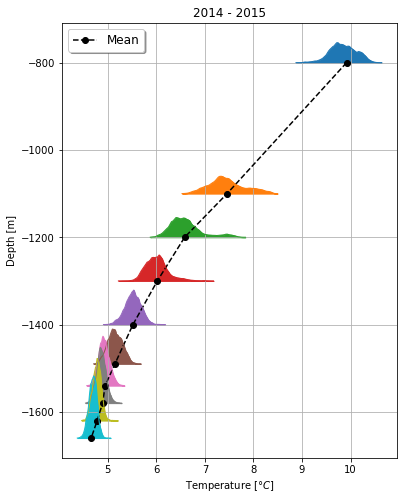

In [6]:
levels = df.keys()
means = df.mean().values 

fig, ax = plt.subplots(1, figsize=(6,8))
ax.plot(means, -levels, 'ko--', label='Mean')

colors = plt.rcParams["axes.prop_cycle"]()

for i, key in enumerate(levels):
    c = next(colors)['color']
    val_min = df[key].min()
    val_max = df[key].max()
    x_values = np.linspace(val_min, val_max, 64)
    base_line = np.zeros_like(x_values) - levels[i]

    kernel = stats.gaussian_kde(df[key].dropna())
    kde = kernel(x_values)*30 - levels[i]

    ax.plot(x_values, kde, color=c, lw=1)
    ax.fill_between(x_values, base_line, kde, alpha=1, color=c)

ax.set_xlabel(r'Temperature [$\degree C$]')
ax.set_ylabel('Depth [m]')
ax.set_title(f'{year-1} - {year}')
ax.grid()
ax.legend(fontsize=12, shadow=True)

## comparing years

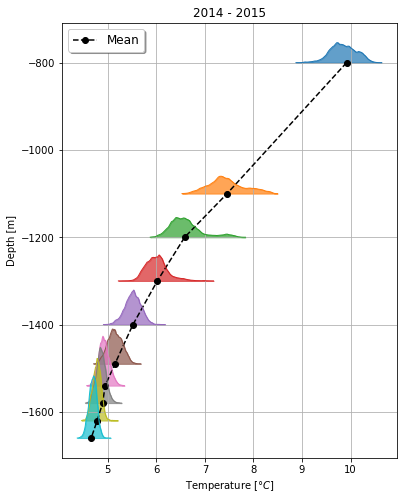

In [7]:
levels = df.keys()
means = df.mean().values 

fig, ax = plt.subplots(1, figsize=(6,8))
ax.plot(means, -levels, 'ko--', label='Mean')

colors = plt.rcParams["axes.prop_cycle"]()

for i, key in enumerate(levels):
    c = next(colors)['color']
    val_min = df[key].min()
    val_max = df[key].max()
    x_values = np.linspace(val_min, val_max, 64)
    base_line = np.zeros_like(x_values) - levels[i]

    kernel = stats.gaussian_kde(df[key].dropna())
    kde = kernel(x_values)*30 - levels[i]

    ax.plot(x_values, kde, color=c, lw=1)
    ax.fill_between(x_values, base_line, kde, alpha=0.7, color=c)

ax.set_xlabel(r'Temperature [$\degree C$]')
ax.set_ylabel('Depth [m]')
ax.set_title(f'{year-1} - {year}')
ax.grid()
ax.legend(fontsize=12, shadow=True)

In [8]:
depths_global = {}

for y in range(2011,2020):
    with Dataset(f'../netcdf/{y}/rbr.nc', 'r') as nc:
        depths_global[y] = np.array(nc['DEPTH'][:])


In [9]:
depths_global

{2011: array([1200., 1300., 1400.], dtype=float32),
 2012: array([1100., 1200., 1300., 1400., 1490., 1540., 1580., 1620., 1660.],
       dtype=float32),
 2013: array([1100., 1200., 1300., 1400., 1500., 1540., 1580., 1620., 1660.],
       dtype=float32),
 2014: array([ 800., 1100., 1200., 1300., 1400., 1540., 1580., 1620., 1660.],
       dtype=float32),
 2015: array([ 800., 1100., 1200., 1300., 1400., 1490., 1540., 1580., 1620.,
        1660.], dtype=float32),
 2016: array([ 800., 1200., 1300., 1400., 1540., 1580., 1620., 1660.],
       dtype=float32),
 2017: array([ 780.,  943., 1190., 1289., 1382., 1458., 1507., 1557., 1606.,
        1665.], dtype=float32),
 2018: array([ 800.,  900., 1200., 1300., 1350., 1490., 1540., 1580., 1620.,
        1660.], dtype=float32),
 2019: array([ 800.,  900., 1200., 1300., 1350., 1490., 1540., 1580., 1620.,
        1660.], dtype=float32)}

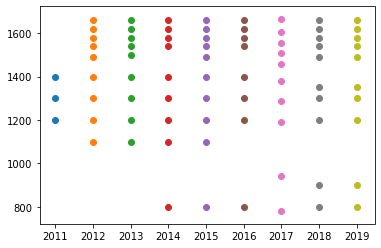

In [10]:
for y in range(2011,2020):
    x = np.zeros(len(depths_global[y])) + y
    plt.scatter(x, depths_global[y])

In [11]:
temp_1200 = {}
i_level = 1200
for y in range(2011,2020):
    with Dataset(f'../netcdf/{y}/rbr.nc', 'r') as nc:
        depth_y = np.array(nc['DEPTH'][:])
        
        #print(y, depth_y)
        
        if y==2017:
            idx = np.where(depth_y==1190)[0]
            temp_1200[y] = np.array(nc['TEMP'][:,2])
            
            continue
        
        idx = np.where(depth_y==i_level)[0]
                
        #print(y, idx)
        for i in idx:
            temp_1200[y] = np.array(nc['TEMP'][:,i])

            
with Dataset(f'../netcdf/{2017}/rbr.nc', 'r') as nc:
    temp_1200[2017] = np.array(nc['TEMP'][:,2])

/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less
/Users/claudiopierard/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater


In [12]:
temp_1200

{2011: array([6.4187, 6.4166, 6.4154, ..., 6.3703, 6.4398, 6.4898], dtype=float32),
 2012: array([5.8728, 5.8736, 5.8744, ..., 6.7024, 6.7026, 6.7027], dtype=float32),
 2013: array([6.6832, 6.6775, 6.6757, ..., 6.3156, 6.316 , 6.3171], dtype=float32),
 2014: array([6.8705, 6.8608, 6.8561, ...,    nan,    nan,    nan], dtype=float32),
 2015: array([6.4862, 6.4043, 6.3854, ..., 6.736 , 6.7292, 6.7255], dtype=float32),
 2016: array([6.9144, 6.9141, 6.9137, ...,    nan,    nan,    nan], dtype=float32),
 2017: array([6.7543, 6.6583, 6.5579, ..., 6.2661, 6.2658, 6.2656], dtype=float32),
 2018: array([7.4956193, 7.4152355, 7.2998476, ..., 8.3701935, 8.6047945,
        8.548303 ], dtype=float32),
 2019: array([6.8253374, 6.8259063, 6.826112 , ..., 6.881129 , 6.98888  ,
        7.07033  ], dtype=float32)}

# The waterfall

In [55]:
def waterfall_plot(data, bins=64, dist_height=30, alpha=1, figsize=(6,7), cmap='tab10', border=False):
    """

    Guillaume's waterfall plot. 
    """
    nrows = len(data.keys())
    levels = np.array(list(data.keys()))
    means = [data[i][~np.isnan(data[i])].mean() for i in data.keys()]
    x_colors = np.linspace(0,1, nrows)
    colors = cm.get_cmap(cmap)(x_colors)
    plt.figure(figsize=figsize)
    plt.plot(means, -levels, 'ko--', label='Mean')
    
    for i, key in enumerate(levels):
        c = colors[i]
        val_min = data[key][~np.isnan(data[key])].min()
        val_max = data[key][~np.isnan(data[key])].max()
        x_values = np.linspace(val_min, val_max, bins)
        base_line = np.zeros_like(x_values) - levels[i]
        kernel = stats.gaussian_kde(data[key][~np.isnan(data[key])])
        kde = kernel(x_values)*dist_height - levels[i]
        plt.fill_between(x_values, base_line, kde, alpha=alpha, color=c)
        if border == True:
            plt.plot(x_values, kde, color='k', lw=1)

    plt.legend(fontsize=12, shadow=True, loc='upper left')

Text(0, 0.5, 'Depth [m]')

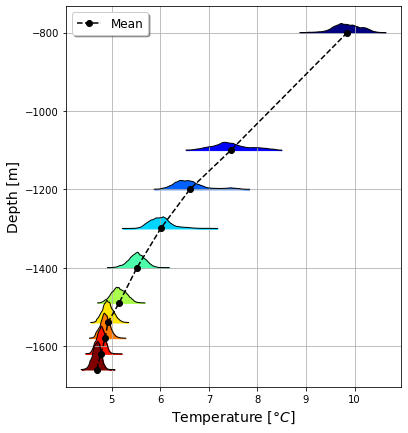

In [60]:
waterfall_plot(temp_year, dist_height=15, cmap='jet', border=True)
plt.grid()
plt.xlabel(r'Temperature [$\degree C$]', fontsize=14)
plt.ylabel(r'Depth [m]', fontsize=14)

[ 800. 1100. 1200. 1300. 1400. 1490. 1540. 1580. 1620. 1660.]
[9.849773, 7.454634, 6.6079144, 6.007042, 5.5172076, 5.1496463, 4.918687, 4.8611937, 4.7717557, 4.68893]


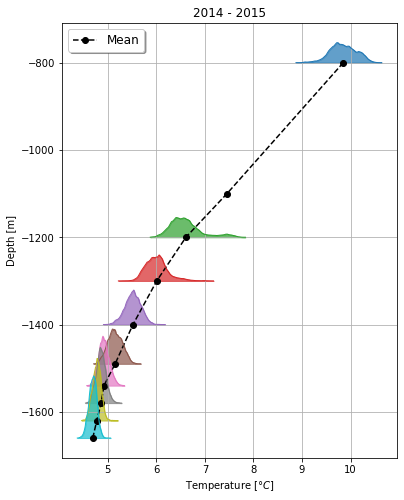

In [15]:
levels = np.array(list(temp_year.keys()))
print(levels)
means = [temp_year[i][~np.isnan(temp_year[i])].mean() for i in temp_year.keys()]
print(means)
fig, ax = plt.subplots(1, figsize=(6,8))

ax.plot(means, -levels, 'ko--', label='Mean')

colors = plt.rcParams["axes.prop_cycle"]()

for i, key in enumerate(levels):
    c = next(colors)['color']
    val_min = temp_year[key].min()
    val_max = temp_year[key].max()
    x_values = np.linspace(val_min, val_max, 64)
    base_line = np.zeros_like(x_values) - levels[i]

    kernel = stats.gaussian_kde(temp_year[key][~np.isnan(temp_year[key])])
    kde = kernel(x_values)*30 - levels[i]

    ax.plot(x_values, kde, color=c, lw=1)
    ax.fill_between(x_values, base_line, kde, alpha=0.7, color=c)

ax.set_xlabel(r'Temperature [$\degree C$]')
ax.set_ylabel('Depth [m]')
ax.set_title(f'{year-1} - {year}')
ax.grid()
ax.legend(fontsize=12, shadow=True)

# Ridge Plot

In [18]:
def ridge_plot(data, xlabel, bins=128, h_space=-0.5, alpha=1, figsize=(8,8), cmap='tab10'):

    nrows = len(data.keys())
    labels = list(temp_1200.keys())
    
    x_colors = np.linspace(0,1, nrows)
    colors = cm.get_cmap(cmap)(x_colors)
    
    fig, axes = plt.subplots(nrows,  sharex=True, figsize=figsize)
    
    min_glob = 999

    for i, key in enumerate(data.keys()):
        val_min = data[key][~np.isnan(data[key])].min()
        val_max = data[key][~np.isnan(data[key])].max()
        
        if val_min < min_glob:
            min_glob = val_min
    
        x_values = np.linspace(val_min, val_max, bins)

        c = colors[i]
        
        kernel = stats.gaussian_kde(data[key][~np.isnan(data[key])])
        kde = kernel(x_values)

        axes[i].plot(x_values, kde, color="#f0f0f0", lw=1)
        
        axes[i].fill_between(x_values, kde, color=c, alpha=alpha)
        rect = axes[i].patch
        rect.set_alpha(0)
        axes[i].tick_params(left=False, labelleft=False)

        if i == len(data.keys())-1:
            axes[i].tick_params(bottom=True, left=False, labelleft=False)
            spines = ["top","right","left"]
            #axes[i].set_ylim(-0.05,)
            axes[i].set_xlim(min_glob,)
            axes[i].set_xlabel(xlabel, fontsize=14)

        else:
            axes[i].tick_params(bottom=False, left=False, labelleft=False)
            spines = ["top","right","left","bottom"]

        for s in spines:
            axes[i].spines[s].set_visible(False)

        depth_label = str(int(key))
        
    for j,l in enumerate(data.keys()): 
        axes[j].text(min_glob, 0.05, labels[j], fontweight="bold", fontsize=13, ha="right")

    plt.subplots_adjust(hspace=h_space)


In [35]:
from matplotlib.colors import LinearSegmentedColormap


def display_cmap(cmap):
    plt.imshow(np.linspace(0, 100, 256)[None, :], aspect=25, interpolation='nearest', cmap=cmap) 
    plt.axis('off')

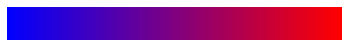

In [36]:
basic_cols=['blue', 'red']
my_cmap=LinearSegmentedColormap.from_list('mycmap', basic_cols)
display_cmap(my_cmap)

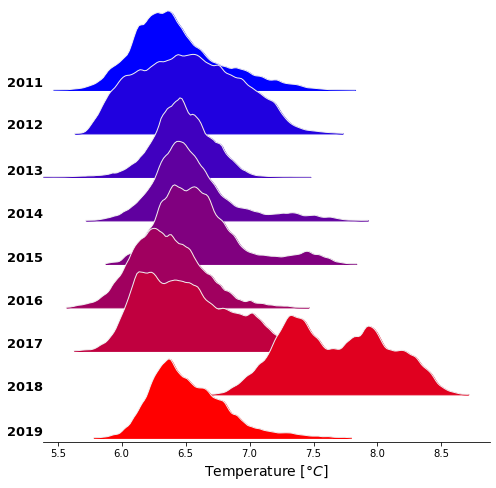

In [21]:
ridge_plot(temp_1200, r'Temperature [$\degree C$]', cmap=my_cmap)